
# Top Businesses to consider in Major cities in the World


### Introduction
To identify the Top Venue Categories in 4 Major Cities. 

* Toronto, Canada.
* NewYork, USA.
* Sydney, Australia.
* Delhi, India.

This would help in identifying the best businesses to decide for Startup, Investors, Multinational companies. 

In [49]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
#import folium # plotting library
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize



print('Libraries imported.')

Libraries imported.


In [50]:
### Client ID
CLIENT_ID = 'MOHSQFGPXDFL22AKLNJDNDCLVENNIX1KJIUCKX0PDLMIMRTW'
             # your Foursquare ID
CLIENT_SECRET = 'MVCS5J2HAKENKKGSFTSZCTNFOALDUMKYAX2P05YR51R3H5PZ'
             # your Foursquare Secret
VERSION = '20181109'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: MOHSQFGPXDFL22AKLNJDNDCLVENNIX1KJIUCKX0PDLMIMRTW
CLIENT_SECRET:MVCS5J2HAKENKKGSFTSZCTNFOALDUMKYAX2P05YR51R3H5PZ


### Data
- List of Postal/Zip codes along with Latitudes and Longitudes are extracted from various sources like websites, csv files, github repository

- Using the Foursquare API, List of Venues and respective categories are pulled using each Longitudes, Latitudes assigned to each Postal/Zip Codes. 

- Data is analysized to find the Top 10 categories in each city


### Import Toronto Postodes with Latitude and Longitude

In [51]:
###Import Data into dataframe
TR_url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
TR_website_data = (pd.io.html.read_html(TR_url))
TR_table = TR_website_data[0]


### Change Header to first row
TR_table.columns = TR_table.iloc[0]
TR_data = TR_table[1:]
### Delete rows with Borough with Not Assigned Value
TR_df1 = TR_data[TR_data.Borough != 'Not assigned']

TR_dfx = TR_df1.groupby(['Postcode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()
TR_dfx.loc[TR_dfx['Neighbourhood'] == 'Not assigned','Neighbourhood'] = TR_dfx['Borough']
TR_dfx = TR_dfx[TR_dfx.Neighbourhood != 'Neighbourhood' ]
TR_df2 = pd.read_csv('https://cocl.us/Geospatial_data')
TR_df2.rename(columns={'Postal Code':'Postcode'}, inplace=True)
TR_neighborhoods = pd.merge(TR_dfx, TR_df2, on='Postcode')
TR_neighborhoods.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### Import Delhi ZipCodes with Latitude and Longitude

In [53]:
NY_neighborhoods = pd.read_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\NY_ZipCode.csv')
#NY_neighborhoods = NY_data.head()
NY_neighborhoods.head()

,Zipcode,City,Latitude,Longitude
0,10001,Manhattan,40.750742,-73.99653
1,10002,Manhattan,40.717040,-73.98700
2,10003,Manhattan,40.732509,-73.98935
3,10004,Manhattan,40.699226,-74.04118
4,10005,Manhattan,40.706019,-74.00858


In [66]:
DEL_neighborhoods = pd.read_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\DEL_Zipcode.csv')
DEL_neighborhoods.head()

,Zipcode,Name,Latitude,Longitude
0,110001,New Delhi,28.6333,77.2167
1,110002,New Delhi,28.6333,77.2500
2,110003,New Delhi,28.6500,77.2167
3,110004,New Delhi,28.6500,77.2167
4,110005,New Delhi,28.6500,77.2000


In [65]:
SYD_neighborhoods = pd.read_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\SYD_ZipCode.csv')
#NY_neighborhoods = NY_data.head()
SYD_neighborhoods.head()

,Zipcode,City,Latitude,Longitude
0,1001,SYDNEY,-33.794883,151.268071
1,1002,SYDNEY,-33.794883,151.268071
2,1003,SYDNEY,-33.794883,151.268071
3,1004,SYDNEY,-33.794883,151.268071
4,1005,SYDNEY,-33.794883,151.268071


## Import Data from Toronto FOURSQUARE Venue Data from each Post code

In [60]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 50000 # define radiussadfasdf

# get the list of URLs with Longitude and Latitude values thru loop
TR_Foursquare_df=pd.DataFrame()

for index,row in TR_neighborhoods.iterrows():
    TR_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID ,
        CLIENT_SECRET,
        VERSION,
        row['Latitude'],
        row['Longitude'],
        radius, 
        LIMIT)
     
    TR_results = requests.get(TR_url).json()
    try:
        TR_venues = TR_results['response']['groups'][0]['items']
    except Exception:
        pass
    TR_nearby_venues = json_normalize(TR_venues)
    TR_Foursquare_df = TR_Foursquare_df.append(TR_nearby_venues,ignore_index=True)

TR_Foursquare_df.to_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\TR_Foursquare_data.csv')

print('CSV file Created')


CSV file Created


## Import Data from Sydney FOURSQUARE Venue Data from each Post code

In [64]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 50000 # define radiussadfasdf

# get the list of URLs with Longitude and Latitude values thru loop
SYD_Foursquare_df=pd.DataFrame()

for index,row in SYD_neighborhoods.iterrows():
    SYD_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID ,
        CLIENT_SECRET,
        VERSION,
        row['Latitude'],
        row['Longitude'],
        radius, 
        LIMIT)
     
    SYD_results = requests.get(SYD_url).json()
    try:
        SYD_venues = SYD_results['response']['groups'][0]['items']
    except Exception:
        pass
    SYD_nearby_venues = json_normalize(SYD_venues)
    SYD_Foursquare_df = SYD_Foursquare_df.append(SYD_nearby_venues,ignore_index=True)

SYD_Foursquare_df.to_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\SYD_Foursquare_data.csv')

print('CSV file Created')


C:\Users\UzwalGutta\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


CSV file Created


## Import Data from Delhi FOURSQUARE Venue Data from each Post code

In [67]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 50000 # define radiussadfasdf

# get the list of URLs with Longitude and Latitude values thru loop
DEL_Foursquare_df=pd.DataFrame()

for index,row in DEL_neighborhoods.iterrows():
    DEL_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID ,
        CLIENT_SECRET,
        VERSION,
        row['Latitude'],
        row['Longitude'],
        radius, 
        LIMIT)
     
    DEL_results = requests.get(DEL_url).json()
    try:
        DEL_venues = DEL_results['response']['groups'][0]['items']
    except Exception:
        pass
    DEL_nearby_venues = json_normalize(DEL_venues)
    DEL_Foursquare_df = DEL_Foursquare_df.append(DEL_nearby_venues,ignore_index=True)

DEL_Foursquare_df.to_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\DEL_Foursquare_data.csv')

print('CSV file Created')


CSV file Created


### Import Data from NewYork FOURSQUARE Venue Data from each Zip code

In [68]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 50000 # define radiussadfasdf

# get the list of URLs with Longitude and Latitude values thru loop
NY_Foursquare_df=pd.DataFrame()

for index,row in NY_neighborhoods.iterrows():
    NY_url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID ,
        CLIENT_SECRET,
        VERSION,
        row['Latitude'],
        row['Longitude'],
        radius, 
        LIMIT)
     
    NY_results = requests.get(NY_url).json()
    try:
        NY_venues = NY_results['response']['groups'][0]['items']
    except Exception:
        pass
    NY_nearby_venues = json_normalize(NY_venues)
    NY_Foursquare_df = NY_Foursquare_df.append(NY_nearby_venues,ignore_index=True)

NY_Foursquare_df.to_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\NY_Foursquare_data.csv')

print('CSV file Created')


C:\Users\UzwalGutta\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


CSV file Created


In [216]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
print('done')

done


In [217]:
TR_csvdata =  TR_Foursquare_df[['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.city']]
TR_filtered_columns = ['venue.categories','venue.name','venue.location.lat', 'venue.location.lng', 'venue.location.city']
toronto_data =TR_csvdata.loc[:, TR_filtered_columns]
toronto_data["venue.location.city"].fillna("Toronto", inplace = True) 
toronto_data['venue.categories'] = toronto_data.apply(get_category_type, axis=1)
toronto_data.loc[toronto_data['venue.location.city'] !='Toronto', ['venue.location.city']] = 'Toronto'
toronto_data.to_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\toronto_data.csv')
toronto_data.head()

,venue.categories,venue.name,venue.location.lat,venue.location.lng,venue.location.city
0,Athletics & Sports,Toronto Pan Am Sports Centre,43.790623,-79.193869,Toronto
1,Bakery,"Lamanna's Bakery, Cafe & Fine Foods",43.797971,-79.148432,Toronto
2,Park,Port Union Waterfront Park,43.774967,-79.134393,Toronto
3,Vietnamese Restaurant,Pho Metro,43.745365,-79.294462,Toronto
4,Beach,Scarborough Bluffs,43.707780,-79.237239,Toronto


Text(0.5,1,'Top 10 Venue Categories in Toronto')

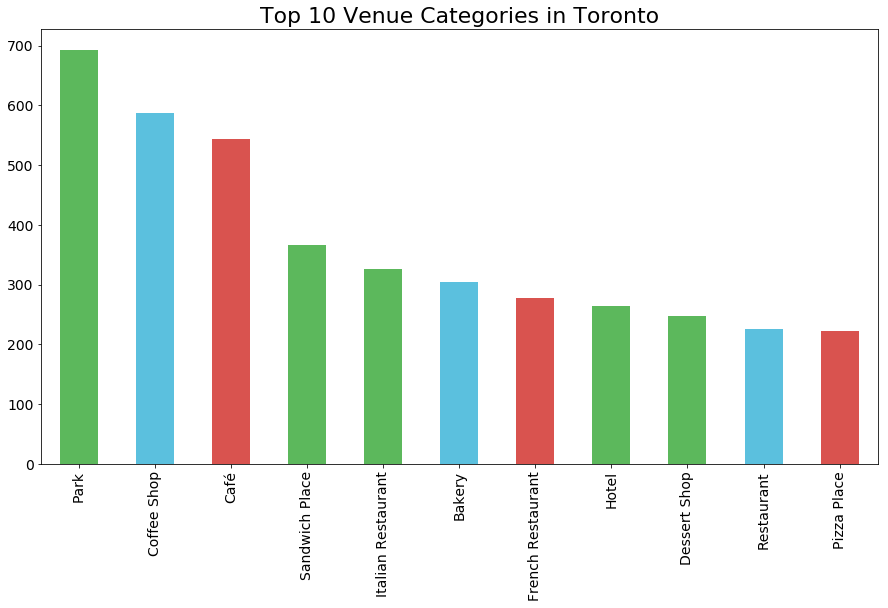

In [526]:
toronto_data_top=toronto_data['venue.categories'].value_counts()
toronto_data_top = toronto_data_top.head(11)
import matplotlib as plt
toronto_data_top.plot(x="venue.categories", y=["venue.name"], kind="bar",figsize=(15, 8),color= ['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)
plt.pyplot.title('Top 10 Venue Categories in Toronto',fontsize = 22)

In [218]:
NY_csvdata =  NY_Foursquare_df[['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.city']]
NY_filtered_columns = ['venue.categories','venue.name','venue.location.lat', 'venue.location.lng', 'venue.location.city']

NewYork_data =NY_csvdata.loc[:, TR_filtered_columns]
NewYork_data["venue.location.city"].fillna("NewYork", inplace = True) 

NewYork_data['venue.categories'] = NewYork_data.apply(get_category_type, axis=1)
NewYork_data.loc[NewYork_data['venue.location.city'] !='NewYork', ['venue.location.city']] = 'NewYork'
NewYork_data.to_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\NewYork_data.csv')
NewYork_data.head()


,venue.categories,venue.name,venue.location.lat,venue.location.lng,venue.location.city
0,Art Gallery,Last Rites Tattoo Theatre and Art Gallery,40.755285,-73.992821,NewYork
1,Park,High Line,40.746825,-74.005507,NewYork
2,Cycle Studio,Peloton,40.743469,-73.994205,NewYork
3,Art Gallery,Gagosian Gallery,40.749493,-74.006050,NewYork
4,Taco Place,Los Tacos No. 1,40.757134,-73.987536,NewYork


Text(0.5,1,'Top 10 Venue Categories in NewYork')

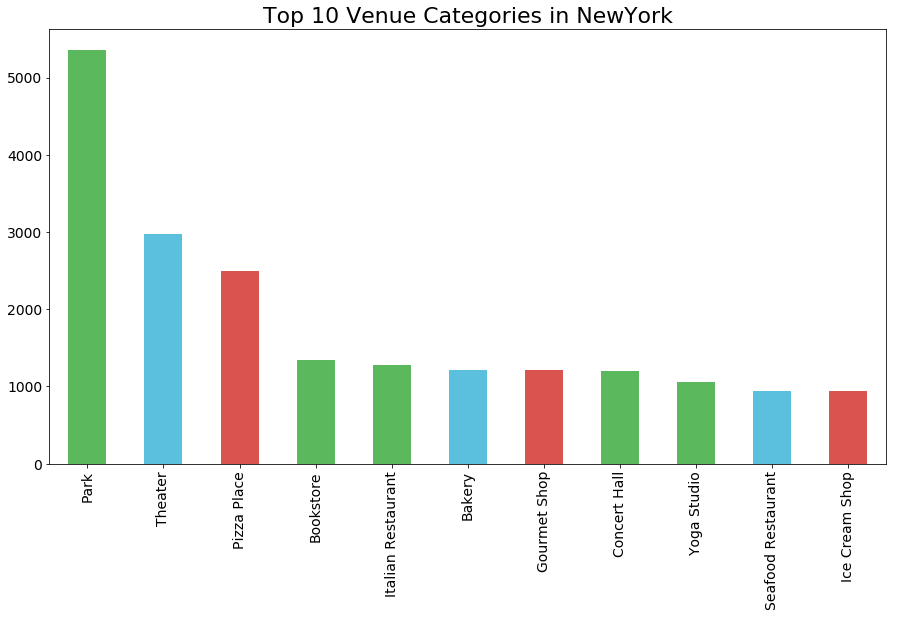

In [527]:
NewYork_data_top=NewYork_data['venue.categories'].value_counts()
NewYork_data_top = NewYork_data_top.head(11)
import matplotlib as plt
NewYork_data_top.plot(x="venue.categories", y=["venue.name"], kind="bar",figsize=(15, 8),color= ['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)
plt.pyplot.title('Top 10 Venue Categories in NewYork',fontsize = 22)

In [501]:
DEL_csvdata =  DEL_Foursquare_df[['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.city']]
DEL_filtered_columns = ['venue.categories','venue.name','venue.location.lat', 'venue.location.lng', 'venue.location.city']

Delhi_data =DEL_csvdata.loc[:, TR_filtered_columns]
Delhi_data["venue.location.city"].fillna("Delhi", inplace = True) 

Delhi_data['venue.categories'] = Delhi_data.apply(get_category_type, axis=1)
Delhi_data.loc[Delhi_data['venue.location.city'] !='NewDelhi', ['venue.location.city']] = 'NewDelhi'
Delhi_data.to_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\Delhi_data.csv')
Delhi_data.head()

,venue.categories,venue.name,venue.location.lat,venue.location.lng,venue.location.city
0,Hotel,The Imperial,28.625548,77.218664,NewDelhi
1,Ice Cream Shop,Naturals Ice Cream,28.634455,77.222139,NewDelhi
2,Plaza,Connaught Place | कनॉट प्लेस (Connaught Place),28.632731,77.220018,NewDelhi
3,Restaurant,Tamra,28.620543,77.218174,NewDelhi
4,Smoke Shop,Pandey Paan,28.622249,77.201075,NewDelhi


Text(0.5,1,'Top 10 Venue Categories in Delhi')

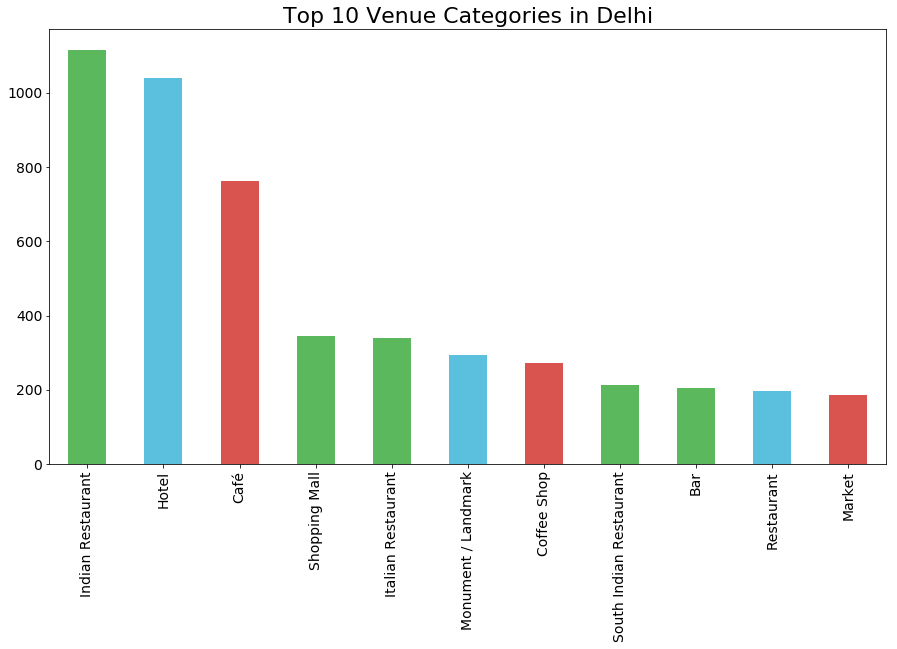

In [528]:
Delhi_data_top=Delhi_data['venue.categories'].value_counts()
#Delhi_data_top = Delhi_data_top.sort_values('venue.name', ascending=False)
Delhi_data_top = Delhi_data_top.head(11)
import matplotlib as plt
Delhi_data_top.plot(x="venue.categories", y=["venue.name"], kind="bar",figsize=(15, 8),color= ['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)
plt.pyplot.title('Top 10 Venue Categories in Delhi' ,fontsize = 22)

In [220]:
SYD_csvdata =  SYD_Foursquare_df[['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng','venue.location.city']]
SYD_filtered_columns = ['venue.categories','venue.name','venue.location.lat', 'venue.location.lng', 'venue.location.city']

Sydney_data =SYD_csvdata.loc[:, TR_filtered_columns]
Sydney_data["venue.location.city"].fillna("Sydney", inplace = True) 

Sydney_data['venue.categories'] = Sydney_data.apply(get_category_type, axis=1)
Sydney_data.loc[Sydney_data['venue.location.city'] !='Sydney', ['venue.location.city']] = 'Sydney'
Sydney_data.to_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\Sydney_data.csv')
Sydney_data.head()


,venue.categories,venue.name,venue.location.lat,venue.location.lng,venue.location.city
0,Beach,Manly Beach,-33.793200,151.287553,Sydney
1,Farmers Market,Harris Farm Markets,-33.786877,151.281547,Sydney
2,Beach,Queenscliff Beach,-33.787273,151.287662,Sydney
3,Beach,Shelly Beach,-33.800297,151.297724,Sydney
4,Brewery,4 Pines Brewpub,-33.799585,151.284966,Sydney


Text(0.5,1,'Top 10 Venue Categories in Sydney')

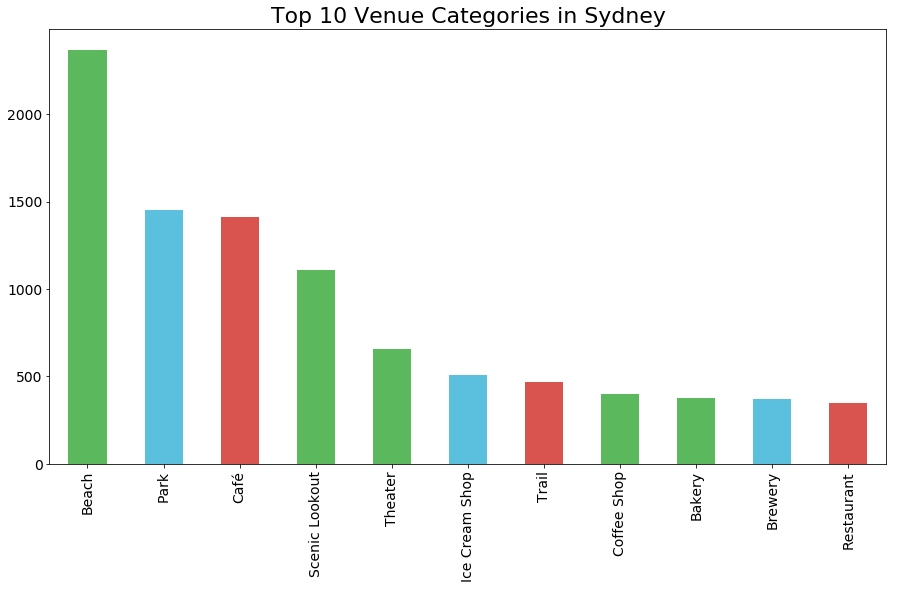

In [563]:
Sydney_data_top=Sydney_data['venue.categories'].value_counts()
Sydney_data_top = Sydney_data_top.head(11)

import matplotlib as plt

Sydney_data_top.plot(x="Venue.count", kind="bar",figsize=(15, 8),color= ['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)
plt.pyplot.title('Top 10 Venue Categories in Sydney' ,fontsize = 22)


## Merging the data of 4 Cities. 

In [316]:
Merged_data = pd.concat([toronto_data, Delhi_data, Sydney_data, NewYork_data])
Merged_data.to_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\Merged_data.csv')
Merged_data.head()

,venue.categories,venue.name,venue.location.lat,venue.location.lng,venue.location.city
0,Athletics & Sports,Toronto Pan Am Sports Centre,43.790623,-79.193869,Toronto
1,Bakery,"Lamanna's Bakery, Cafe & Fine Foods",43.797971,-79.148432,Toronto
2,Park,Port Union Waterfront Park,43.774967,-79.134393,Toronto
3,Vietnamese Restaurant,Pho Metro,43.745365,-79.294462,Toronto
4,Beach,Scarborough Bluffs,43.707780,-79.237239,Toronto


In [335]:
Merged_data.groupby('venue.location.city').count()


,venue.categories,venue.name,venue.location.lat,venue.location.lng
venue.location.city,,,,
NewDelhi,7900,7900,7900,7900
NewYork,48000,48000,48000,48000
Sydney,16745,16745,16745,16745
Toronto,10300,10300,10300,10300


Park           7653
Theater        3771
Pizza Place    2929
Café           2911
Beach          2632
Name: venue.categories, dtype: int64

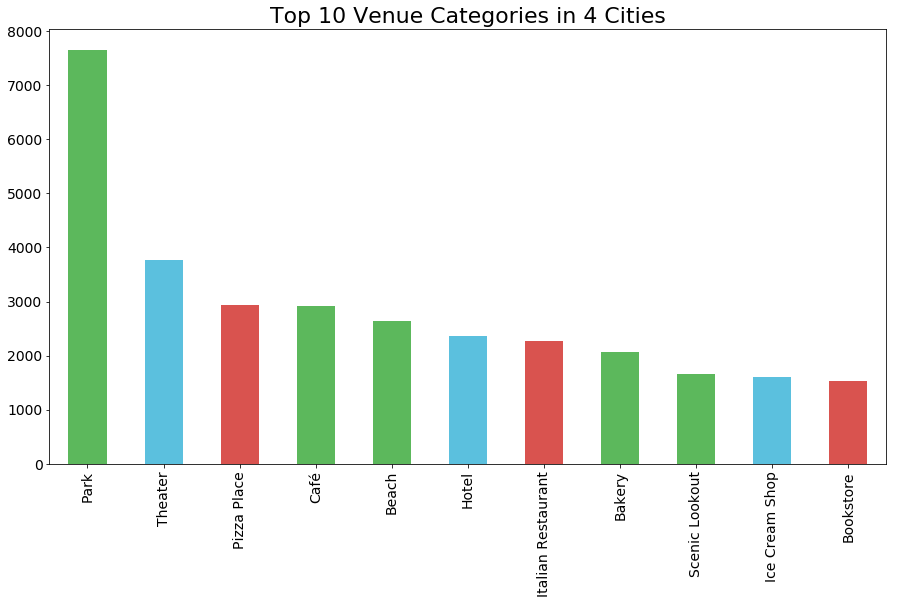

In [750]:
Merged_data_top=Merged_data['venue.categories'].value_counts()
#Delhi_data_top = Delhi_data_top.sort_values('venue.name', ascending=False)
Merged_data_top = Merged_data_top.head(11)
import matplotlib as plt
Merged_data_top.plot(x="venue.categories", y=["venue.name"], kind="bar",figsize=(15, 8),color= ['#5cb85c', '#5bc0de', '#d9534f'], fontsize=14)
plt.pyplot.title('Top 10 Venue Categories in 4 Cities' ,fontsize = 22)



In [318]:
print('There are {} uniques categories.'.format(len(Merged_data['venue.categories'].unique())))

There are 198 uniques categories.


In [578]:
# one hot encoding
Merged_data_onehot = pd.get_dummies(Merged_data[['venue.categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Merged_data_onehot['venue.location.city'] = Merged_data['venue.location.city']

# move neighborhood column to the first column
fixed_columns = [Merged_data_onehot.columns[-1]] + list(Merged_data_onehot.columns[:-1])
Merged_data_onehot = Merged_data_onehot[fixed_columns]
Merged_data_onehot.head()

,venue.location.city,Airport Lounge,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Toronto,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Toronto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Toronto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Toronto,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,Toronto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [668]:
Merged_grouped = Merged_data_onehot.groupby('venue.location.city').mean().reset_index()
Merged_grouped

,venue.location.city,Airport Lounge,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Water Park,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,NewDelhi,0.000000,0.012278,0.000000,0.000000,0.020000,0.000000,0.000000,0.007848,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.008481,0.000000,0.000000,0.000000,0.000000
1,NewYork,0.000000,0.010042,0.000000,0.000000,0.015417,0.014917,0.000000,0.000000,0.003917,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.016854,0.022000,0.000000
2,Sydney,0.000119,0.000478,0.000179,0.000000,0.011227,0.000000,0.000000,0.009436,0.000000,...,0.000060,0.000239,0.009316,0.00000,0.000478,0.010570,0.010869,0.000000,0.009973,0.008958
3,Toronto,0.000000,0.010874,0.000000,0.000874,0.010000,0.000000,0.008641,0.008350,0.004951,...,0.001942,0.000000,0.009126,0.00301,0.000000,0.000000,0.000000,0.000000,0.000971,0.000000


In [323]:
    num_top_venues = 5

    for hood in Merged_grouped['venue.location.city']:
        print("----"+hood+"----")
        temp = Merged_grouped[Merged_grouped['venue.location.city'] == hood].T.reset_index()
        temp.columns = ['venue','freq']
        temp = temp.iloc[1:]
        temp['freq'] = temp['freq'].astype(float)
        temp = temp.round({'freq': 2})
        print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
        print('\n')

----NewDelhi----
                venue  freq
0   Indian Restaurant  0.14
1               Hotel  0.13
2                Café  0.10
3       Shopping Mall  0.04
4  Italian Restaurant  0.04


----NewYork----
                venue  freq
0                Park  0.11
1             Theater  0.06
2         Pizza Place  0.05
3  Italian Restaurant  0.03
4           Bookstore  0.03


----Sydney----
            venue  freq
0           Beach  0.14
1            Park  0.09
2            Café  0.08
3  Scenic Lookout  0.07
4         Theater  0.04


----Toronto----
               venue  freq
0               Park  0.07
1        Coffee Shop  0.06
2               Café  0.05
3     Sandwich Place  0.04
4  French Restaurant  0.03




In [669]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [670]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['venue.location.city']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['venue.location.city'] = Merged_grouped['venue.location.city']

for ind in np.arange(Merged_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Merged_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted

,venue.location.city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,NewDelhi,Indian Restaurant,Hotel,Café,Shopping Mall,Italian Restaurant,Monument / Landmark,Coffee Shop,South Indian Restaurant,Bar,Restaurant
1,NewYork,Park,Theater,Pizza Place,Bookstore,Italian Restaurant,Bakery,Gourmet Shop,Concert Hall,Yoga Studio,Seafood Restaurant
2,Sydney,Beach,Park,Café,Scenic Lookout,Theater,Ice Cream Shop,Trail,Coffee Shop,Bakery,Brewery
3,Toronto,Park,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Bakery,French Restaurant,Hotel,Dessert Shop,Restaurant


### Methodology 
Kmeans clustering if any of the cities are similar to each other. 

In [780]:
# set number of clusters
kclusters = 2

Merged_data_clustering1 = Merged_grouped1.drop('venue.categories',1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Merged_data_clustering1)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [781]:
LatLong = pd.read_csv(r'C:\Users\UzwalGutta\Desktop\DataScience Coursera\Capstone Project\LatitudeandLongitude.csv')
LatLong.head()

,City,Latitude,Longitude
0,NewYork,40.712800,74.00600
1,NewDelhi,28.613900,77.20900
2,Sydney,-33.867487,151.20699
3,Toronto,43.653200,79.38320


In [675]:
CityData = LatLong

# add clustering labels
CityData['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
CityData = CityData.join(city_venues_sorted.set_index('venue.location.city'), on='City')

CityData

,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,NewYork,40.712800,74.00600,0,Park,Theater,Pizza Place,Bookstore,Italian Restaurant,Bakery,Gourmet Shop,Concert Hall,Yoga Studio,Seafood Restaurant
1,NewDelhi,28.613900,77.20900,3,Indian Restaurant,Hotel,Café,Shopping Mall,Italian Restaurant,Monument / Landmark,Coffee Shop,South Indian Restaurant,Bar,Restaurant
2,Sydney,-33.867487,151.20699,2,Beach,Park,Café,Scenic Lookout,Theater,Ice Cream Shop,Trail,Coffee Shop,Bakery,Brewery
3,Toronto,43.653200,79.38320,1,Park,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Bakery,French Restaurant,Hotel,Dessert Shop,Restaurant


In [782]:
CityData.loc[CityData['Cluster Labels'] == 0, CityData.columns[[0]+ list(range(4, CityData.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,NewYork,Park,Theater,Pizza Place,Bookstore,Italian Restaurant,Bakery,Gourmet Shop,Concert Hall,Yoga Studio,Seafood Restaurant


In [783]:
CityData.loc[CityData['Cluster Labels'] == 1, CityData.columns[[0] + list(range(4, CityData.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Toronto,Park,Coffee Shop,Café,Sandwich Place,Italian Restaurant,Bakery,French Restaurant,Hotel,Dessert Shop,Restaurant


In [785]:
CityData.loc[CityData['Cluster Labels'] == 2, CityData.columns[[0] + list(range(4, CityData.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Sydney,Beach,Park,Café,Scenic Lookout,Theater,Ice Cream Shop,Trail,Coffee Shop,Bakery,Brewery


In [786]:
CityData.loc[CityData['Cluster Labels'] == 3, CityData.columns[[0] + list(range(4, CityData.shape[1]))]]

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,NewDelhi,Indian Restaurant,Hotel,Café,Shopping Mall,Italian Restaurant,Monument / Landmark,Coffee Shop,South Indian Restaurant,Bar,Restaurant


### Result
- Kmeans clustering has identified that each of the cities are different from each other in terms of venue categories. 

- Toronto, Sydney, NewDelhi has 3rd most common venues are Cafes. which shows that Cafes are good small investment in these cities. 

- Food places, like Restaurants, Pizza Places are good for medium scale investments

- Identifying the venue categories provide good insight on which business thrive in the cities. 

- Using the api, we can identify multiple cities around the world to check what would be the best investments. 
